In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [3]:
path = r'C:\Users\JOY\Downloads\Advertising (1).csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


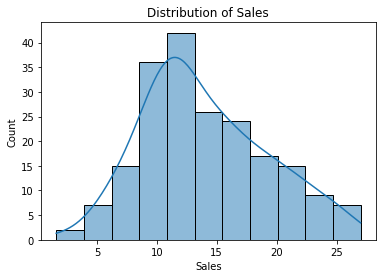

In [4]:
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


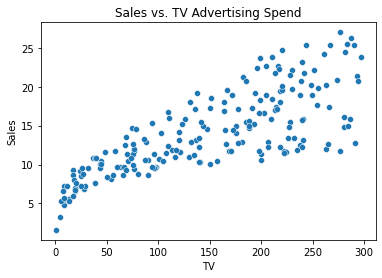

In [5]:
sns.scatterplot(data['TV'], data['Sales'])
plt.title('Sales vs. TV Advertising Spend')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


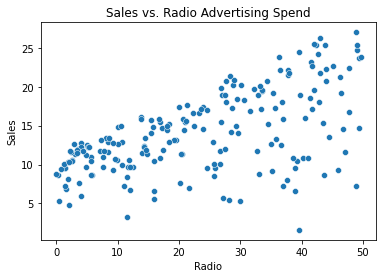

In [6]:
sns.scatterplot(data['Radio'], data['Sales'])
plt.title('Sales vs. Radio Advertising Spend')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


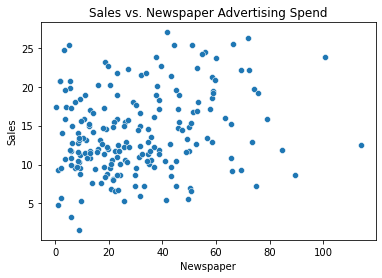

In [7]:
sns.scatterplot(data['Newspaper'], data['Sales'])
plt.title('Sales vs. Newspaper Advertising Spend')
plt.show()

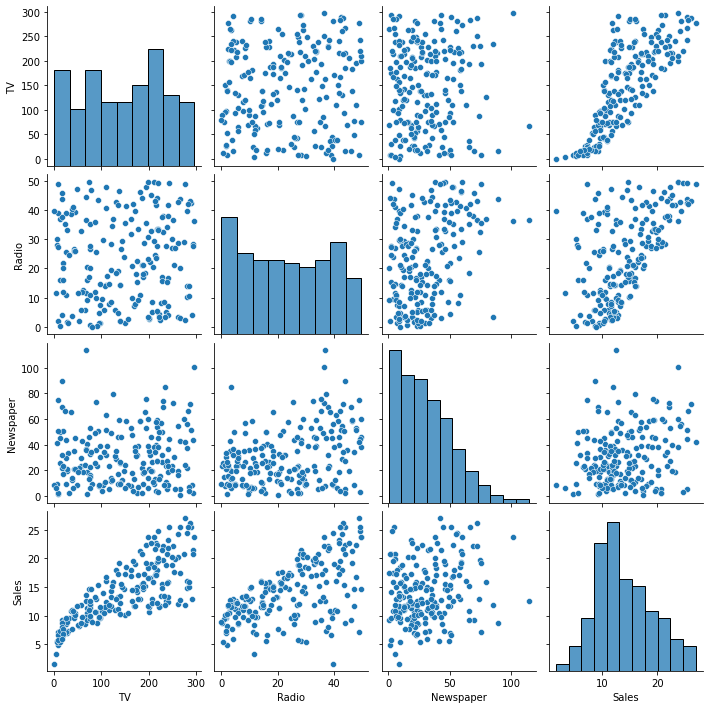

In [8]:
sns.pairplot(data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

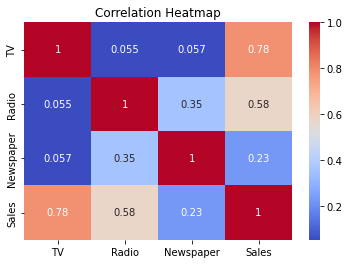

In [9]:
sns.heatmap(data[['TV', 'Radio', 'Newspaper', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


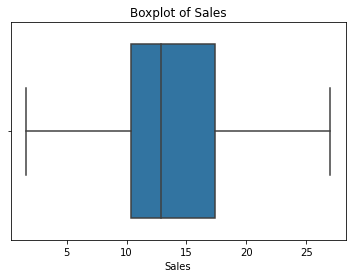

In [10]:
sns.boxplot(data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


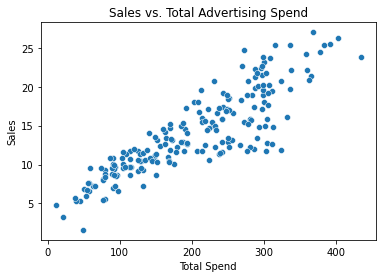

In [11]:
data['Total Spend'] = data['TV'] + data['Radio'] + data['Newspaper']
sns.scatterplot(data['Total Spend'], data['Sales'])
plt.title('Sales vs. Total Advertising Spend')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


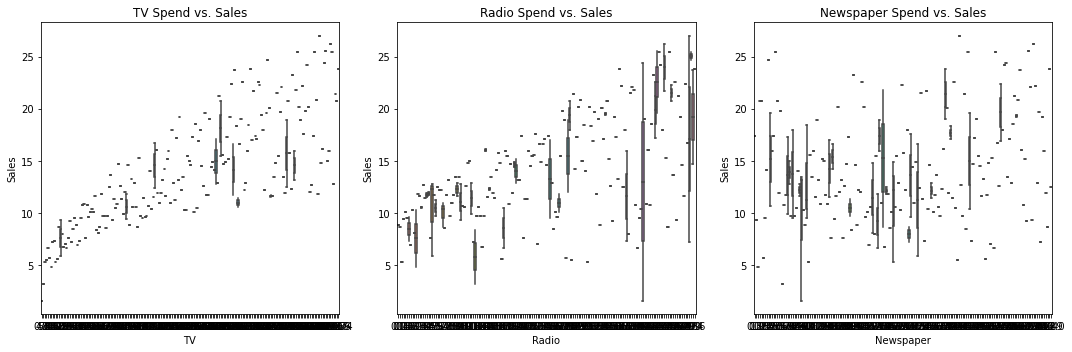

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(data['TV'], data['Sales'])
plt.title('TV Spend vs. Sales')
plt.subplot(1, 3, 2)
sns.boxplot(data['Radio'], data['Sales'])
plt.title('Radio Spend vs. Sales')
plt.subplot(1, 3, 3)
sns.boxplot(data['Newspaper'], data['Sales'])
plt.title('Newspaper Spend vs. Sales')
plt.tight_layout()
plt.show()

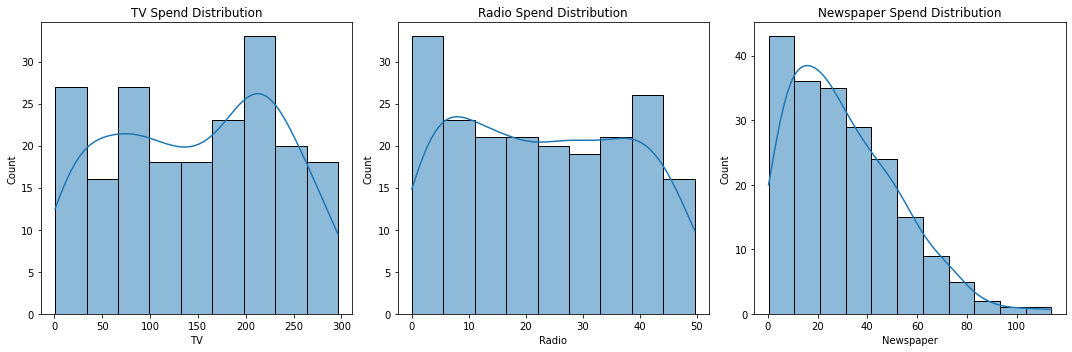

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data['TV'], kde=True)
plt.title('TV Spend Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['Radio'], kde=True)
plt.title('Radio Spend Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['Newspaper'], kde=True)
plt.title('Newspaper Spend Distribution')
plt.tight_layout()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


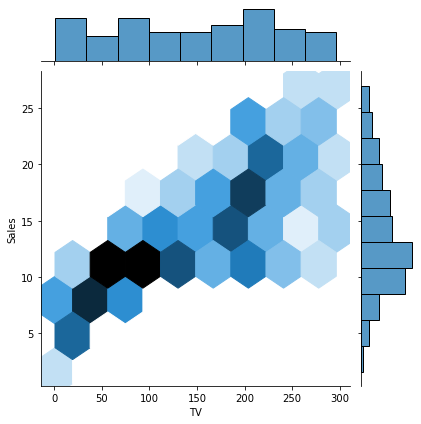

In [14]:
sns.jointplot(data['TV'], data['Sales'], kind='hex')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


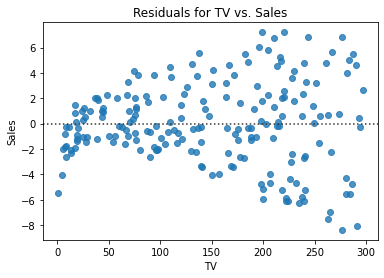

In [15]:
sns.residplot(data['TV'], data['Sales'])
plt.title('Residuals for TV vs. Sales')
plt.show()

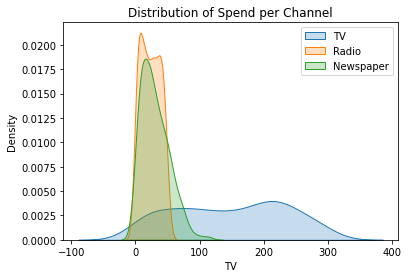

In [16]:
spends = ['TV', 'Radio', 'Newspaper']
for spend in spends:
    sns.kdeplot(data[spend], shade=True, label=spend)
plt.title('Distribution of Spend per Channel')
plt.legend()
plt.show()

# Conclusions
1. Although the given data is not that synchronized yet there is a clear positive co-relation between the Sales and the numbers of TV advertising.
2. On the other hand even if there is a slight positive correlation between the sales and the count of Radio Advetising yet there is no such observable correlation of the sales and the counts of the Newspaper advertising.
3. Also the total cumulitive count of all the modes of advertising and the sales of that respectively follows a normal distribution which helps to draw futhur analytical points  which can be achieved if the dataset is more well refined.
4. From the last grpah we can see that the Radio and Newspaper is more pointed in the central distribution but the density of TV is very well distributed across and there is no central tendency